# Now that you know how to Explore a Dataset, it's time for you to do it from start to end. Please find the Automobile Dataset in your task folder. 

### You are expected to create a report ('eda.docx' provides a template for what this report should look like) in which you explain your visualisations, investigations and findings. The Code for the Analysis should be in a jupyter notebook named automobile.ipynb.

## Be creative :)

In [59]:
# import required packages
import pandas as pd
import numpy as np
import seaborn as sns
import ast,json
import matplotlib.pyplot as plt

%matplotlib inline


In [60]:

autom_df = pd.read_csv("automobile.txt")
autom_df.head(2)


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500


### Data cleaning

Identify columns that are redundant or unnecessary.

In [61]:
# remove any duplicate rows if any
autom_df = autom_df.drop_duplicates()

In [62]:
# it seems NaN data is marked as '?' in the dataset
# replace '?' with NaN(Not a Number)
autom_df.replace('?', np.nan, inplace = True)
autom_df.head(3)


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500


<AxesSubplot: >

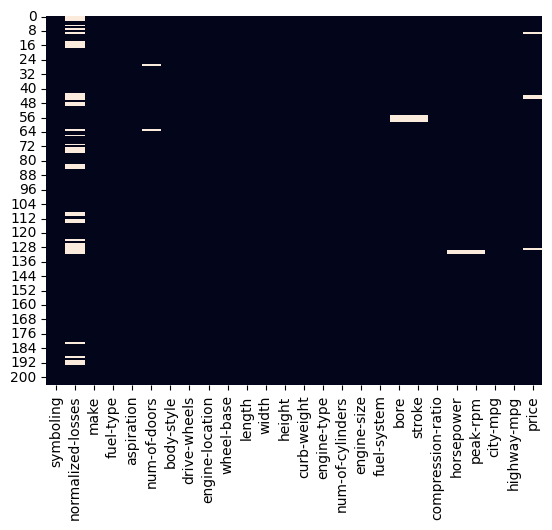

In [63]:
# use seaborn to visualise missing values
sns.heatmap(autom_df.isnull(), cbar=False)

In [64]:
# check full summary statistics to understand value information in each column
autom_df.describe(include = 'all')

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,205.000000,164,205,205,205,203,205,205,205,205.000000,...,205.000000,205,201,201,205.000000,203,203,205.000000,205.000000,201
unique,NaN,51,22,2,2,2,5,3,2,NaN,...,NaN,8,38,36,NaN,59,23,NaN,NaN,186
top,NaN,161,toyota,gas,std,four,sedan,fwd,front,NaN,...,NaN,mpfi,3.62,3.40,NaN,68,5500,NaN,NaN,8921
freq,NaN,11,32,185,168,114,96,120,202,NaN,...,NaN,94,23,20,NaN,19,37,NaN,NaN,2
mean,0.834146,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.756585,...,126.907317,NaN,NaN,NaN,10.142537,NaN,NaN,25.219512,30.751220,NaN
std,1.245307,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.021776,...,41.642693,NaN,NaN,NaN,3.972040,NaN,NaN,6.542142,6.886443,NaN
min,-2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.600000,...,61.000000,NaN,NaN,NaN,7.000000,NaN,NaN,13.000000,16.000000,NaN
25%,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.500000,...,97.000000,NaN,NaN,NaN,8.600000,NaN,NaN,19.000000,25.000000,NaN
50%,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.000000,...,120.000000,NaN,NaN,NaN,9.000000,NaN,NaN,24.000000,30.000000,NaN
75%,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.400000,...,141.000000,NaN,NaN,NaN,9.400000,NaN,NaN,30.000000,34.000000,NaN


_The above table allows us to inspect all column information in the table, where, UNIQUE is the number of distinct objects in the column, TOP is the most frequently occurring object, FREQ is the number of times the top object appears in the column, NaN stands for not a number._

_From the heatmap and above table, it seems there are about a quarter data missing for 'normalized-losses', Columns 'num-of-doors', 'bore', 'stroke', 'horsepower', 'peak-rpm', 'price' only have a few NaN values. Following steps were taken to fill these missing data:_
- Missing values for numeric column were filled with mean value of the column, including ['normalized-losses','bore', 'stroke', 'horsepower', 'peak-rpm', 'price'] columns
- Missing values for categorical column were filled with the most frequent value in the column, including [‘num-of-doors’] column


In [65]:
# Fill the missing numeric values with mean
missing_num_column = ['normalized-losses','bore', 'stroke', 'horsepower', 'peak-rpm', 'price']
for col in missing_num_column:
    autom_df[col] = pd.to_numeric(autom_df[col])
    autom_df[col].fillna(autom_df[col].mean(), inplace=True)

# Fill the missing value for catagorical 'num-of-doors' column with the most frequent value present in the column
# from above statistic overview, 'four' is the most frequent value
#autom_df['num-of-doors'] = autom_df['num-of-doors'].fillna('four', inplace=True)
autom_df['num-of-doors'] = autom_df['num-of-doors'].replace(np.nan, 'four')


In [66]:
# double check if all the NaN value in the dataset being fixed
autom_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    float64
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

_Now, we have got all columns prepared for analysis._

### Data exploration

#### Check the top 5 most expensive cars 


In [67]:
# check the top most expensive cars 
autom_df.sort_values('price', ascending = False).head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
74,1,122.0,mercedes-benz,gas,std,two,hardtop,rwd,front,112.0,...,304,mpfi,3.80,3.35,8.0,184.0,4500.0,14,16,45400.0
16,0,122.0,bmw,gas,std,two,sedan,rwd,front,103.5,...,209,mpfi,3.62,3.39,8.0,182.0,5400.0,16,22,41315.0
73,0,122.0,mercedes-benz,gas,std,four,sedan,rwd,front,120.9,...,308,mpfi,3.80,3.35,8.0,184.0,4500.0,14,16,40960.0
128,3,122.0,porsche,gas,std,two,convertible,rwd,rear,89.5,...,194,mpfi,3.74,2.90,9.5,207.0,5900.0,17,25,37028.0
17,0,122.0,bmw,gas,std,four,sedan,rwd,front,110.0,...,209,mpfi,3.62,3.39,8.0,182.0,5400.0,15,20,36880.0


#### Check popularity of car makers

Text(0.5, 0, 'Car maker')

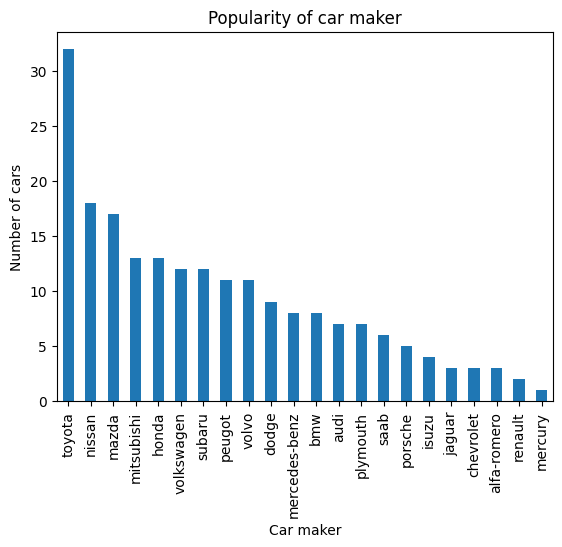

In [68]:
# check top 5 most popular car makers
autom_df['make'].value_counts().plot(kind = 'bar')

plt.title('Popularity of car maker')
plt.ylabel('Number of cars')
plt.xlabel('Car maker')

#### Check fuel-type of all the vehicles

Text(0.5, 1.0, 'Fuel type pie diagram')

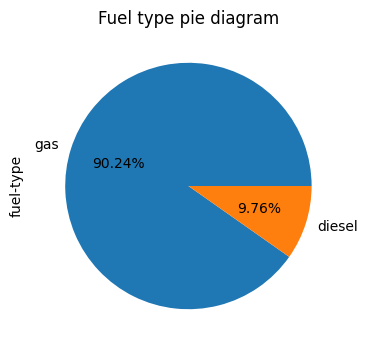

In [69]:
# check fuel-type of all the vehicles
plt.figure(figsize = (5,4))
autom_df['fuel-type'].value_counts().plot(kind='pie', autopct='%.2f%%')
plt.title('Fuel type pie diagram')


_From the diagram, 90.24% vehicles in the dataset are gas, and only 9.76% use diesel. Therefore, gas fuelled vehicles are definitely more popular._

#### Check relationship between horsepower and price

Text(0, 0.5, 'Price')

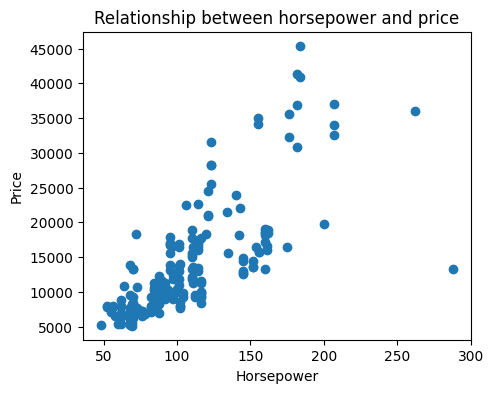

In [70]:
# relationship between horsepower and price
plt.figure(figsize=(5,4))
plt.scatter(x='horsepower', y='price', data=autom_df)
plt.title('Relationship between horsepower and price')
plt.xlabel('Horsepower')
plt.ylabel('Price')


_From the graph above, most of the horsepower values are in the range of 50 to 150, with price values between 5000 and 25000. And in general, the higher the horsepower, the vehicle price would be also higher._

#### Check relationship between engine size and price

Text(0, 0.5, 'Price')

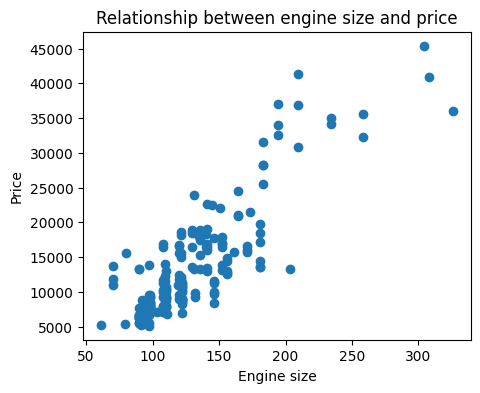

In [73]:
# relationship between engine size and price
plt.figure(figsize=(5,4))
plt.scatter(x='engine-size', y='price', data=autom_df)
plt.title('Relationship between engine size and price')
plt.xlabel('Engine size')
plt.ylabel('Price')

_From the graph above, most of the engine size values seem to be in the range of 70 to 180, with price values between 5000 and 25000. In general, the bigger the engine size, the vehicle price also becomes higher._

#### Correlation analysis_compare influence of all features for vehicles

C:\Users\Feifei\AppData\Local\Temp\ipykernel_16244\3711143683.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(autom_df.corr(), annot=True)


<AxesSubplot: >

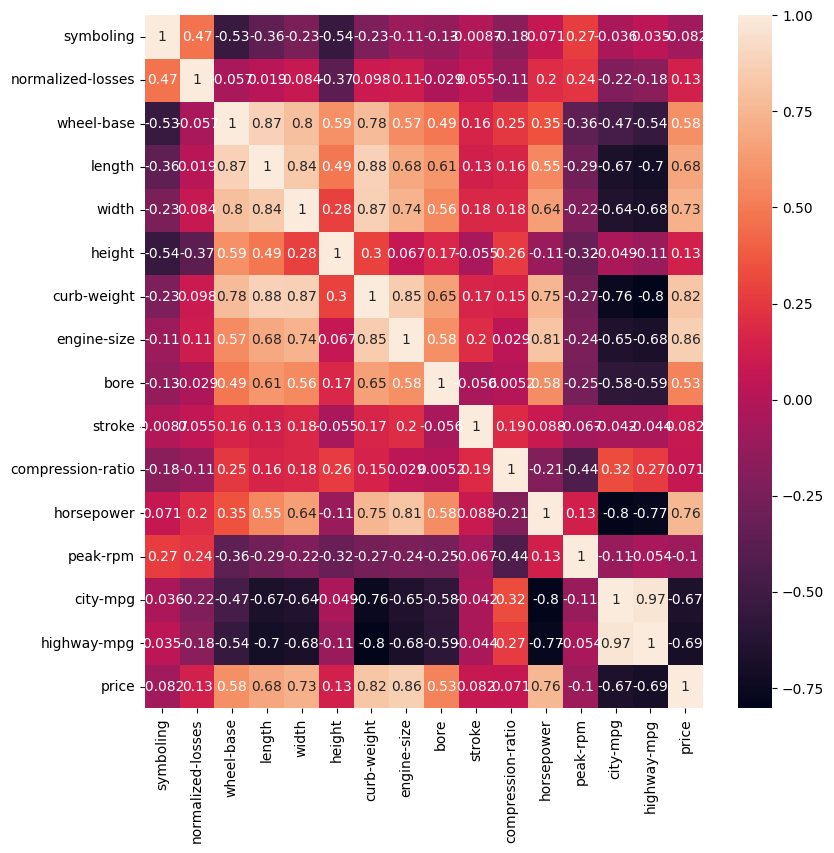

In [72]:
# use a heatmap to compare influence of all features
plt.figure(figsize=(9, 9))
sns.heatmap(autom_df.corr(), annot=True)

_It is found from above graph that:_
- Price is more correlated with engine size, curb-weight and stroke of the vehicle;
- City-mpg and highway-mpg are strongly corelated;
- Curb-weight, engine-size, and horsepower are positively corelated, but curb-weight is mostly correlated with length, width and engine-size;
- Wheel-base is positively corelated with length, width, and curb-weight;
- Normalized-losses and symbolling seem to have less impact on other features of the vehicle.

 



